## Prompt Chaining

To create a blog from the topic. 

Topic -> Blog outline -> Blog generation

In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatGroq(model="openai/gpt-oss-20b")

In [31]:
#define the state 

class BlogState(TypedDict):
    topic: str
    outline: str 
    blog_content: str
    evaluation_score: str

In [32]:
def create_outline(state: BlogState) -> BlogState:
    prompt = f"Create a detailed blog outline for the topic: {state['topic']}"
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

In [33]:
def create_blog(state: BlogState) -> BlogState:
    title = state['topic']
    outline = state['outline']

    prompt = f"Write a detailed blog on the title - {title} using the following outline {outline}"

    content = model.invoke(prompt).content 

    state['blog_content'] = content
    return state

In [34]:
def evaluate_blog(state: BlogState) -> BlogState: 
    outline = state['outline']
    blog_content = state['blog_content']

    prompt = f"Generate an evaluation score wheather blog is written with respect to the generated outline or not. Blog outline is {outline} and blog content is {blog_content}"

    eval_score = model.invoke(prompt).content 

    state['evaluation_score'] = eval_score 

    return state

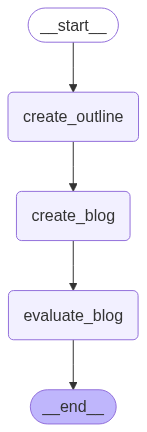

In [35]:
graph = StateGraph(BlogState)

# Add nodes 
graph.add_node("create_outline", create_outline) 
graph.add_node("create_blog", create_blog)  
graph.add_node("evaluate_blog", evaluate_blog)

# add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

#compile
workflow = graph.compile()

workflow


In [36]:
#execute
initial_state = {'topic': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)
print(final_state)


{'topic': 'Rise of AI in India', 'outline': '# Blog Outline  \n**Title:** *The Rise of AI in India: Opportunities, Challenges, and the Road Ahead*  \n\n---\n\n## 1. Introduction  \n- **Hook:** A striking statistic or quote (e.g., “India’s AI market is projected to reach $12\u202fbillion by 2025”).  \n- **Purpose:** Explain why the topic matters now – digital transformation, global competition, societal impact.  \n- **Road‑map:** Briefly list the main sections of the post.\n\n---\n\n## 2. Historical Context  \n| Timeline | Milestone | Impact |\n|----------|-----------|--------|\n| **1990s** | Early AI research in IITs & IISc | Foundational research in NLP & computer vision |\n| **2000s** | Rise of “AI for Good” initiatives | Social sector applications (health, agriculture) |\n| **2010s** | Global AI boom & cloud adoption | Increased data availability & GPU access |\n| **2020–present** | Government’s “Digital India” & “AI for All” | Policy, funding, and ecosystem growth |\n\n*Visual Idea

In [37]:
print(final_state['outline'])

# Blog Outline  
**Title:** *The Rise of AI in India: Opportunities, Challenges, and the Road Ahead*  

---

## 1. Introduction  
- **Hook:** A striking statistic or quote (e.g., “India’s AI market is projected to reach $12 billion by 2025”).  
- **Purpose:** Explain why the topic matters now – digital transformation, global competition, societal impact.  
- **Road‑map:** Briefly list the main sections of the post.

---

## 2. Historical Context  
| Timeline | Milestone | Impact |
|----------|-----------|--------|
| **1990s** | Early AI research in IITs & IISc | Foundational research in NLP & computer vision |
| **2000s** | Rise of “AI for Good” initiatives | Social sector applications (health, agriculture) |
| **2010s** | Global AI boom & cloud adoption | Increased data availability & GPU access |
| **2020–present** | Government’s “Digital India” & “AI for All” | Policy, funding, and ecosystem growth |

*Visual Idea:* A timeline graphic showing key dates and milestones.

---

## 3. Cu

In [38]:
print(final_state['blog_content'])

# The Rise of AI in India: Opportunities, Challenges, and the Road Ahead  

---

## 1. Introduction  

> **Hook:** *“India’s AI market is projected to reach $12 billion by 2025, outpacing many developed economies.”*  

The digital age is no longer a luxury—it's a necessity. With a population of 1.4 billion and a rapidly expanding middle class, India is poised to become a global AI powerhouse. From smart diagnostics in rural clinics to AI‑driven supply chains in Bengaluru’s tech corridors, artificial intelligence is reshaping how we live, work, and govern.  

**Why now?**  
- **Digital transformation** is accelerating across all sectors.  
- **Global competition** (China, the US, EU) is investing billions in AI.  
- **Societal impact**—AI can help close health, education, and agricultural gaps.

**Road‑map of this post**  
1. Historical context of AI in India  
2. The current AI landscape  
3. Government initiatives and policy framework  
4. Success stories and case studies  
5. Challen

In [39]:
print(final_state['evaluation_score'])

**Evaluation Score: 9.5 / 10**

**Why this score?**

| Criterion | Assessment |
|-----------|------------|
| **Section Alignment** | The blog follows the exact order of the outline: Introduction, Historical Context, Current Landscape (with sub‑sections), Government Initiatives, Success Stories, Challenges, Future Outlook, Practical Takeaways, Conclusion, and Resources. |
| **Content Depth** | Each section contains the key bullet points, tables, and data that were explicitly listed in the outline (e.g., AI adoption rates by sector, government policy details, case‑study tables). |
| **Visual Prompts** | The blog references the suggested visuals (timelines, bar charts, infographics, flowcharts) and even mentions the types of images/videos that should accompany the text. |
| **Terminology & Tone** | The language, tone, and phrasing mirror the outline’s style (e.g., “Hook,” “Road‑map,” “Key Players,” “Sector‑specific bar chart”). |
| **Completeness** | All major headings (1–10) are present;